In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

#mithilesh@learnbay.co
#8800686128 for whts_app
# please write your name and batch id in the subject along with project name


UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
xls_data = pd.read_csv('C:/Users/Sanu/Desktop/DataSet/Lab_monitor.csv',encoding= 'unicode_escape')
xls_data

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,8/12/2018 9:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,8/12/2018 9:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,8/12/2018 9:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,8/12/2018 9:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,8/12/2018 9:29,31,In
...,...,...,...,...,...
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In


In [17]:
xls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [3]:
xls_data.id = xls_data.id.str.slice(20,26,1)
xls_data.id=xls_data.id.replace('\_','',regex=True).astype(str)


In [4]:
xls_data.noted_date=xls_data.noted_date.replace('\/','-',regex=True).astype(str)
xls_data

,id,room_id/id,noted_date,temp,out/in
0,196134,Room Admin,8-12-2018 9:30,29,In
1,196131,Room Admin,8-12-2018 9:30,29,In
2,196127,Room Admin,8-12-2018 9:29,41,Out
3,196128,Room Admin,8-12-2018 9:29,41,Out
4,196126,Room Admin,8-12-2018 9:29,31,In
...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In
97602,147733,Room Admin,28-07-2018 07:07,31,In
97603,100386,Room Admin,28-07-2018 07:06,31,In
97604,123297,Room Admin,28-07-2018 07:06,31,In


In [27]:
import datetime

def setSeason(mnt):
    if mnt in [3,4,5]:
        return "summer"
    elif mnt in [6,7,8]:
        return "monsoon"
    elif mnt in [9,10,11]:
        return "post monsoon"
    else:
        return "winter"

def setTimings(hh):
    if hh in range(4,12):
        return "Morning"
    elif hh in range(12,16):
        return "After noon"
    elif hh in range(16,20):
        return "Evening"
    else:
        return "Night"
    
def setinoutcode(x):
    if x=="In":
        return 1
    else:
        return 0

In [6]:
# set year,month,day, hour,minute,weekday,season,timing  column 
datem= [datetime.datetime.strptime(dd, "%d-%m-%Y %H:%M") for dd in xls_data.noted_date]


years = [yy.year for yy in datem]
xls_data['year'] = years
months = [yy.month for yy in datem]
xls_data['month'] =months

days = [yy.day for yy in datem]
xls_data['days'] = days
weekday = [yy.strftime('%A') for yy in datem]
xls_data['weekday'] = weekday

hours = [yy.hour for yy in datem]
xls_data['hours'] = hours
minutes = [yy.minute for yy in datem]
xls_data['minute'] = minutes

seasons = [setSeason(yy.month) for yy in datem]
xls_data['season'] =seasons

timings = [setTimings(yy.hour) for yy in datem]
xls_data['timing'] =timings
xls_data

,id,room_id/id,noted_date,temp,out/in,year,month,days,weekday,hours,minute,season,timing
0,196134,Room Admin,8-12-2018 9:30,29,In,2018,12,8,Saturday,9,30,winter,Morning
1,196131,Room Admin,8-12-2018 9:30,29,In,2018,12,8,Saturday,9,30,winter,Morning
2,196127,Room Admin,8-12-2018 9:29,41,Out,2018,12,8,Saturday,9,29,winter,Morning
3,196128,Room Admin,8-12-2018 9:29,41,Out,2018,12,8,Saturday,9,29,winter,Morning
4,196126,Room Admin,8-12-2018 9:29,31,In,2018,12,8,Saturday,9,29,winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,2018,7,28,Saturday,7,7,monsoon,Morning
97602,147733,Room Admin,28-07-2018 07:07,31,In,2018,7,28,Saturday,7,7,monsoon,Morning
97603,100386,Room Admin,28-07-2018 07:06,31,In,2018,7,28,Saturday,7,6,monsoon,Morning
97604,123297,Room Admin,28-07-2018 07:06,31,In,2018,7,28,Saturday,7,6,monsoon,Morning


In [29]:
inout_codes= [setinoutcode(i) for i in xls_data["out/in"]]
xls_data['inout_code'] =inout_codes
xls_data

,id,room_id/id,noted_date,temp,out/in,year,month,days,weekday,hours,minute,season,timing,inout_code
0,196134,Room Admin,8-12-2018 9:30,29,In,2018,12,8,Saturday,9,30,winter,Morning,1
1,196131,Room Admin,8-12-2018 9:30,29,In,2018,12,8,Saturday,9,30,winter,Morning,1
2,196127,Room Admin,8-12-2018 9:29,41,Out,2018,12,8,Saturday,9,29,winter,Morning,0
3,196128,Room Admin,8-12-2018 9:29,41,Out,2018,12,8,Saturday,9,29,winter,Morning,0
4,196126,Room Admin,8-12-2018 9:29,31,In,2018,12,8,Saturday,9,29,winter,Morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,2018,7,28,Saturday,7,7,monsoon,Morning,1
97602,147733,Room Admin,28-07-2018 07:07,31,In,2018,7,28,Saturday,7,7,monsoon,Morning,1
97603,100386,Room Admin,28-07-2018 07:06,31,In,2018,7,28,Saturday,7,6,monsoon,Morning,1
97604,123297,Room Admin,28-07-2018 07:06,31,In,2018,7,28,Saturday,7,6,monsoon,Morning,1


In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
xls_data


,id,room_id/id,noted_date,temp,out/in,year,month,days,weekday,hours,minute,season,timing,inout_code
0,196134,Room Admin,8-12-2018 9:30,29,In,2018,12,8,Saturday,9,30,winter,Morning,1
1,196131,Room Admin,8-12-2018 9:30,29,In,2018,12,8,Saturday,9,30,winter,Morning,1
2,196127,Room Admin,8-12-2018 9:29,41,Out,2018,12,8,Saturday,9,29,winter,Morning,0
3,196128,Room Admin,8-12-2018 9:29,41,Out,2018,12,8,Saturday,9,29,winter,Morning,0
4,196126,Room Admin,8-12-2018 9:29,31,In,2018,12,8,Saturday,9,29,winter,Morning,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97601,91076,Room Admin,28-07-2018 07:07,31,In,2018,7,28,Saturday,7,7,monsoon,Morning,1
97602,147733,Room Admin,28-07-2018 07:07,31,In,2018,7,28,Saturday,7,7,monsoon,Morning,1
97603,100386,Room Admin,28-07-2018 07:06,31,In,2018,7,28,Saturday,7,6,monsoon,Morning,1
97604,123297,Room Admin,28-07-2018 07:06,31,In,2018,7,28,Saturday,7,6,monsoon,Morning,1


In [70]:
df_month = pd.DataFrame().assign(temp=xls_data["temp"],month=xls_data["month"])
df_month = df_month.drop_duplicates()
df_month.corr()

,temp,month
temp,1.000000,-0.035863
month,-0.035863,1.000000


In [68]:
x = df_month.iloc[:,:-2].values
y = df_month.iloc[:,1].values

# Split the dataset into the training set and test set

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3 )
print ( xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(104, 1) (52, 1) (104,) (52,)


In [65]:
# Creating a LinearRegression object and fitting it on our training set.
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain) # fit() is running the training process

# Predicting the test set results
yPrediction = linearRegressor.predict(xTest)

In [66]:
yPrediction

array([10.177057  ,  9.83691987,  9.78023035,  9.66685131,  9.72354083,
        9.95029892,  9.72354083,  9.55347227, 10.06367796,  9.75188559,
        9.69519607, 10.26209128,  9.72354083, 10.20540176,  9.63850655,
        9.63850655,  9.83691987,  9.61016179, 10.34712556,  9.72354083,
        9.78023035,  9.69519607,  9.80857511,  9.75188559,  9.75188559,
        9.80857511, 10.23374652, 10.09202272,  9.75188559, 10.0353332 ,
        9.8936094 ,  9.78023035,  9.86526463,  9.52512751,  9.61016179,
        9.97864368,  9.58181703, 10.00698844,  9.75188559, 10.0353332 ,
       10.177057  ,  9.83691987, 10.14871224, 10.14871224,  9.8936094 ,
        9.61016179,  9.52512751,  9.80857511,  9.83691987,  9.92195416,
        9.78023035, 10.177057  ])

In [ ]:
yPrediction

<AxesSubplot:xlabel='seasn', ylabel='Count'>

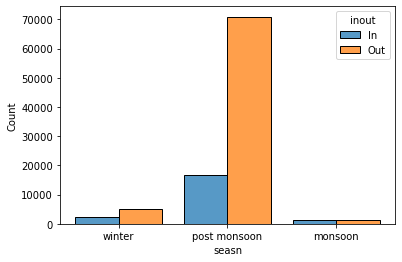

In [55]:
df_season = pd.DataFrame().assign(temp=xls_data["temp"],seasn=xls_data["season"],inout=xls_data["out/in"])
sns.histplot(df_season, x="seasn", hue="inout", multiple="dodge", shrink=.8)

1970-01-03 11:58:54
